# Least squares

The following is an example from Lecture 06.

The result of census of the population of Switzerland between 1900 and 2010 (in thousands) is summarized in the following table:

|	year	|	population	|
|-----------|---------------|
|	1900	|	3315	|
|	1910	|	3753	|
|	1920	|	3880	|
|	1930	|	4066	|
|	1941	|	4266	|
|	1950	|	4715	|
|	1960	|	5429	|
|	1970	|	6270	|
|	1980	|	6366	|
|	1990	|	6874	|
|	2000	|	7288	|
|	2010	|	7783	|


* Is it possible to estimate the number of inhabitants of Switzerland
during the year when there has not been census, for example in 1945
and 1975?

* Is it possible to predict the number of inhabitants of Switzerland in
2020?

coefficients from linalg: [[-3.05552999e-15]
 [-1.17919895e-11]
 [-3.42965011e-08]
 [ 4.20205942e+01]
 [-7.68197492e+04]]
coefficients from polyfit: [[-4.67358316e-05]
 [ 3.61958136e-01]
 [-1.05084023e+03]
 [ 1.35544722e+06]
 [-6.55417893e+08]]
population in 1945: [4910.04616766] vs [4638.96199274]
population in 1975: [6170.65312111] vs [6172.88450694]
population in 2020: [8061.56295654] vs [7750.07171512]


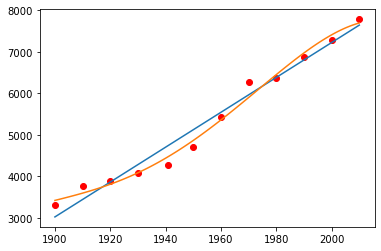

In [36]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *

year = array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

assert len(year) is len(population)
n = len(year)
deg = 4
#B = matrix([ones(n), year, year**2, year**3]).T#, year**4]).T
B = matrix([year**i for i in range(deg+1)]).T#, year**4]).T
BT = B.T

#makes y the column vector of population
y = matrix(population).T

a = linalg.solve(BT*B, BT*y)
a = array([c for c in reversed(a)])
a = a.reshape((deg+1, 1))
print(f"coefficients from linalg: {a}")
#
b = polyfit(year, y, deg)#, rcond=None, full=False, w=None, cov=False)
print(f"coefficients from polyfit: {b}")

xx = linspace(1900, 2010, 100)
XX = matrix([xx**i for i in range(deg)]).T
#f = lambda coeff: sum(XX * coeff, axis=1)#a0 + a1*x + a2*x**2 + a3*x**3# + a4*x**4
f = lambda coeff, x: polyval(coeff, x)

_ = plot(xx, polyval(a, xx))
_ = plot(xx, polyval(b, xx))
_ = scatter(year, population, color='r')

print(f"population in 1945: {f(a, 1945)} vs {f(b, 1945)}")
print(f"population in 1975: {f(a, 1975)} vs {f(b, 1975)}")
print(f"population in 2020: {f(a, 2020)} vs {f(b, 2020)}")